# S2: Análisis exploratorio de datos

Rodrigo García Manzanas: <rodrigo.manzanas@unican.es>

*Depto. Matemática Aplicada y Ciencias de la Computación*

[R for Data Science](http://r4ds.had.co.nz/index.html)  
![manualRdatascience](figs/manual_R_for_Data_Science.jpg)

## Visualización de datos
### (Dataset de ejemplo: *Iris de Fisher* y *mpg*)

Una de las claves en data science es poder realizar *plots* (gráficos) que ayuden a **entender los datos**. Para ilustrar la importancia de la visualización, en esta sección utilizaremos el dataset de **Iris de Fisher** (también llamado Iris de Anderson) (https://en.wikipedia.org/wiki/Iris_flower_data_set).

<img src="figs/tipos_iris.png" width= "650"/> 

Este conjunto de datos contiene 150 muestras de tres especies distintas de Iris (**setosa**, **virginica** e **versicolor**). Cada muestra/observación/instancia contiene cuatro medidas: **largo y ancho del sépalo** y **largo y ancho del pétalo**. En base a la combinación de estas cuatro variables, Fisher desarrolló un modelo discriminante para distinguir entre una especie y otra. 


El dataset *Iris de Fischer* se encuentra disponible en el paquete `datasets`, que se carga automáticamente en memoria al abrir una instancia de R:

In [1]:
?iris

iris                 package:datasets                  R Documentation

_E_d_g_a_r _A_n_d_e_r_s_o_n'_s _I_r_i_s _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     This famous (Fisher's or Anderson's) iris data set gives the
     measurements in centimeters of the variables sepal length and
     width and petal length and width, respectively, for 50 flowers
     from each of 3 species of iris.  The species are _Iris setosa_,
     _versicolor_, and _virginica_.

_U_s_a_g_e:

     iris
     iris3
     
_F_o_r_m_a_t:

     'iris' is a data frame with 150 cases (rows) and 5 variables
     (columns) named 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
     'Petal.Width', and 'Species'.

     'iris3' gives the same data arranged as a 3-dimensional array of
     size 50 by 4 by 3, as once provided by S-PLUS.  The first
     dimension gives the case number within the species subsample, the
     second the measurements with names 'Sepal L.', 'Sepal W.', 'Petal
  

Podemos consultar cuál es la estructura de `iris` con la función `str()`:

In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


También podemos visualizar las primeras filas con las funciones `head()` y `tail()`:

In [4]:
head(iris)
tail(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


La función `summary()` también es muy útil:

In [5]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

La función de visualización básica de R es `plot`:

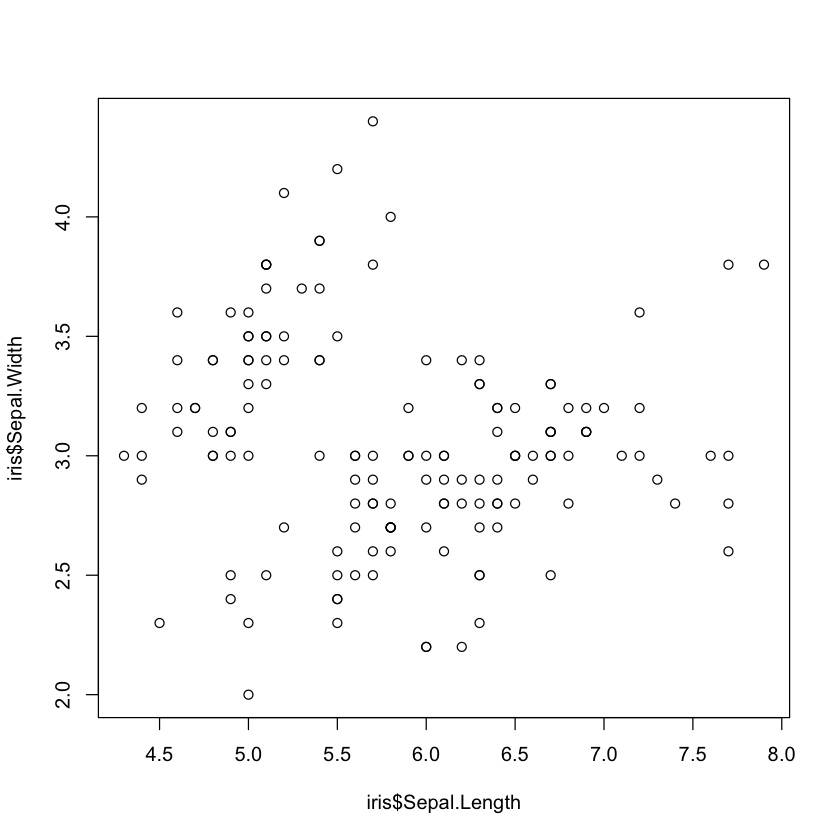

In [6]:
par(bg = 'white')
plot(iris$Sepal.Length, iris$Sepal.Width)

Vamos a crear ahora la misma gráfica pero **diferenciando con colores las diferentes especies de Iris**. Para ello realizaremos una pequeña transformación de los datos tal y como se muestra a continuación:

In [7]:
levels(iris$Species)  # las tres especies

# extraigo los datos que corresponden únicamente a la especie de Iris Setosa
ind.setosa <- which(iris$Species == "setosa")
str(iris[ind.setosa, ])

# la función `subset` nos permite hacer lo mismo en un solo paso
setosa <- subset(iris, Species == "setosa")
str(setosa)

[1] "setosa"     "versicolor" "virginica"

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Si aplicamos `subset()` para cada una de las especies, mediante las funciones `plot` y `points` podemos diferenciarlas en un mismo gráfico:

In [8]:
versicolor <- subset(iris, Species == "versicolor")
virginica <- subset(iris, Species == "virginica")

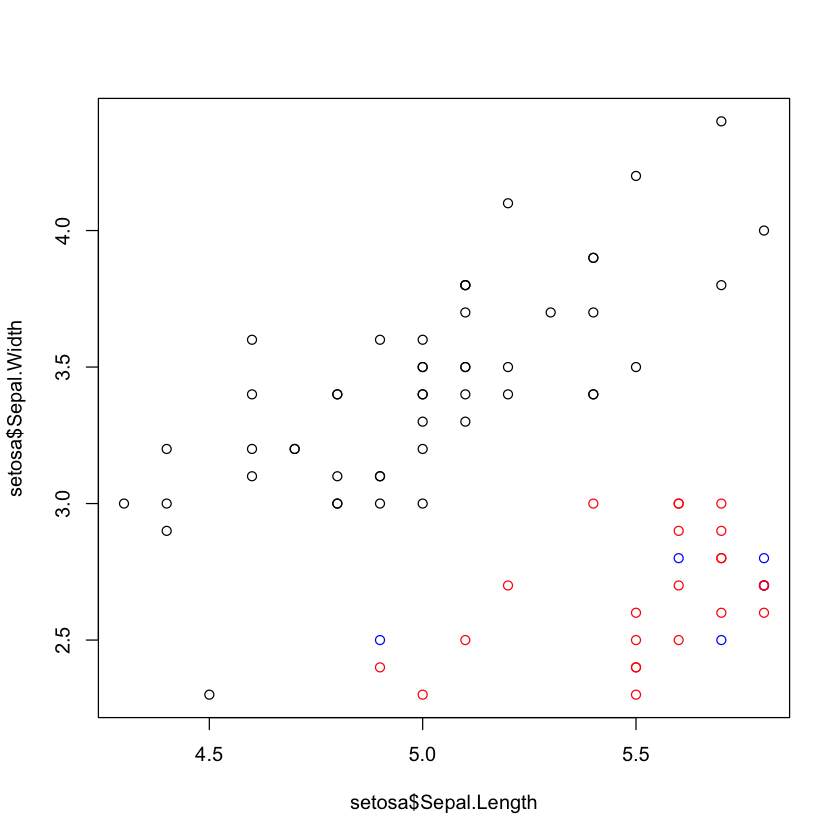

In [9]:
par(bg = 'white')
plot(setosa$Sepal.Length, setosa$Sepal.Width)
points(virginica$Sepal.Length, virginica$Sepal.Width, col = "blue")
points(versicolor$Sepal.Length, versicolor$Sepal.Width, col = "red")

Este mismo plot se podría haber hecho directamente pasándole al argumento `col` la variable `Species`:

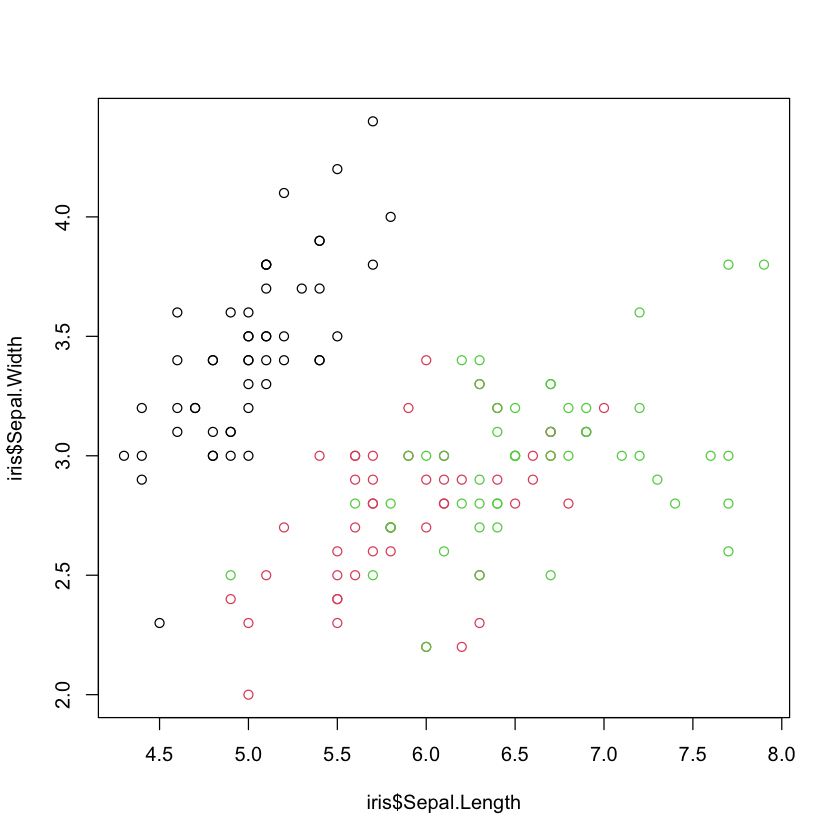

In [10]:
par(bg = 'white')
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species)

Algunos argumentos opcionales de `plot`:

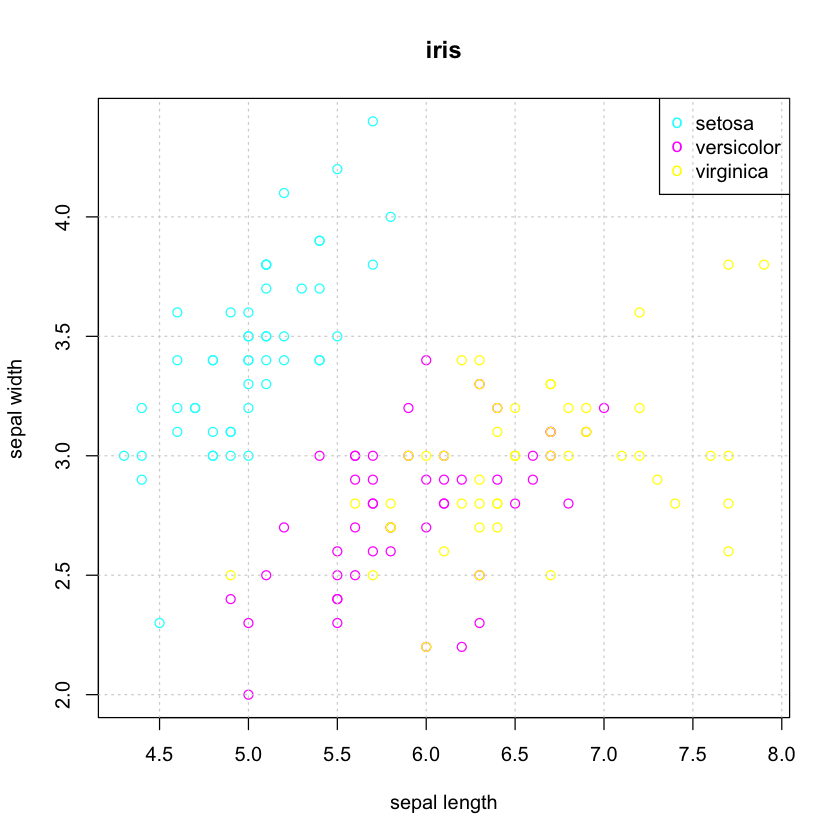

In [11]:
par(bg = 'white')
plot(iris$Sepal.Length, iris$Sepal.Width, 
     col = c("cyan", "magenta", "yellow")[iris$Species],
    xlab = "sepal length", ylab = "sepal width",
    main = "iris")
legend("topright", levels(iris$Species), pch = "o", col = c("cyan", "magenta", "yellow"))
grid()

Existen librerías más potentes para la visualización de datos, por ejemplo, `ggplot2` o `lattice`:

In [12]:
# install.packages("lattice")  # instalamos lattice
library(lattice)  # cargamos en memoria lattice

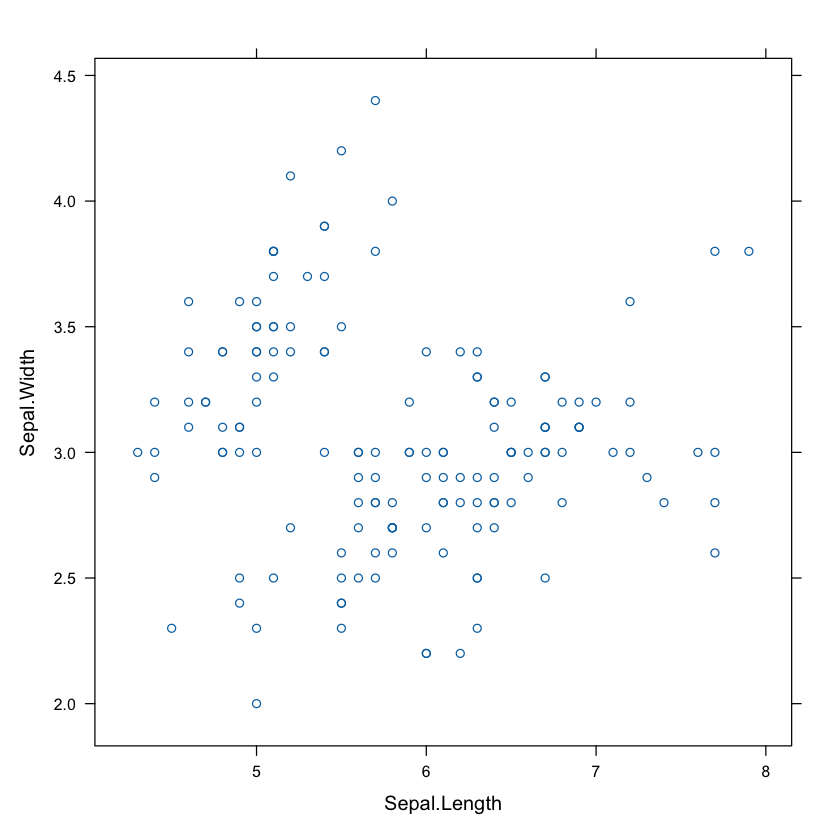

In [13]:
# función xyplot
xyplot(Sepal.Width ~ Sepal.Length, data = iris)

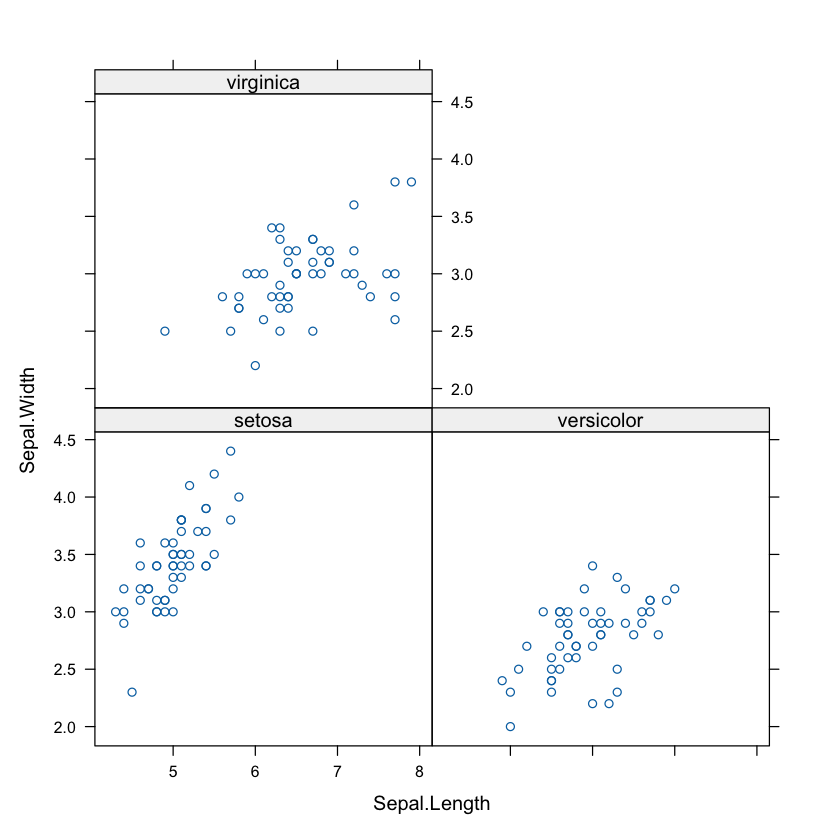

In [14]:
xyplot(Sepal.Width ~ Sepal.Length | Species, data = iris)

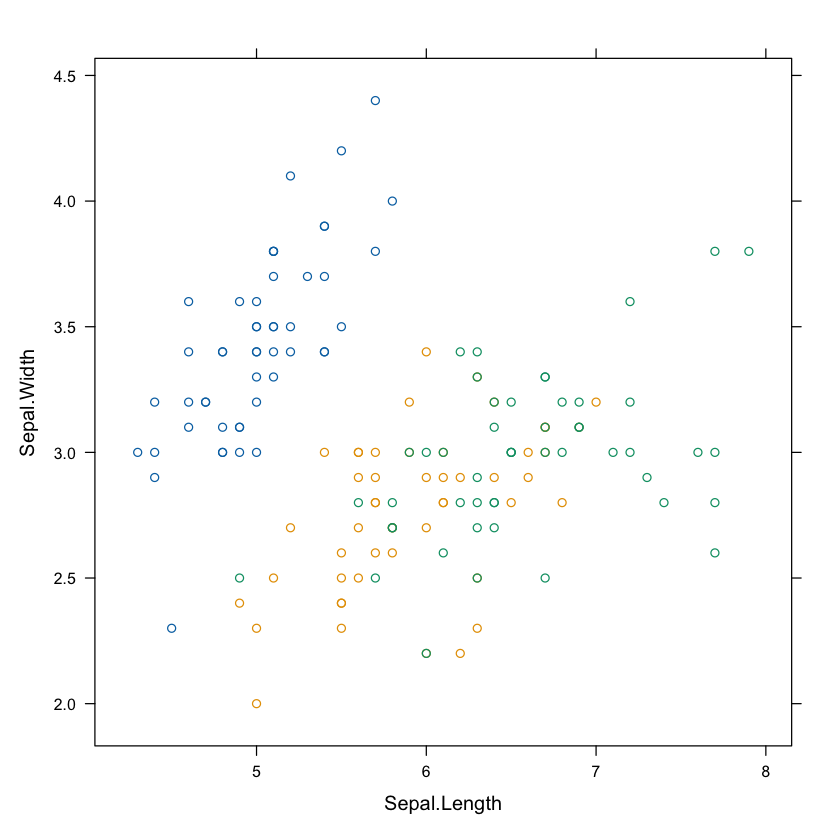

In [15]:
xyplot(Sepal.Width ~ Sepal.Length, group = Species, data = iris)

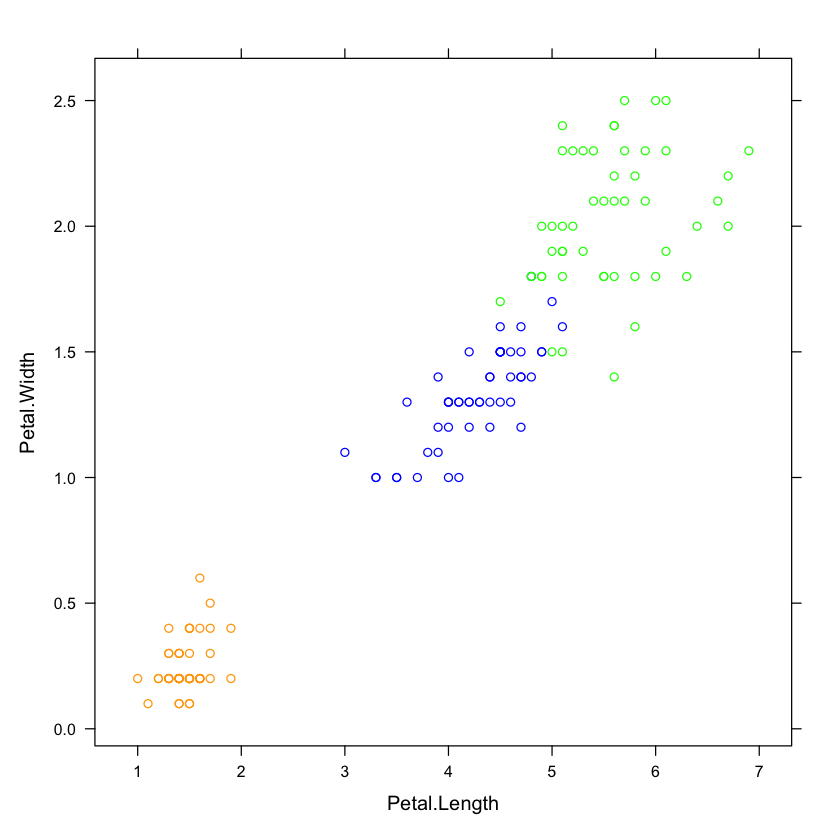

In [16]:
xyplot(Petal.Width ~ Petal.Length, group = Species, data = iris, 
              col = c("orange", "blue", "green"))

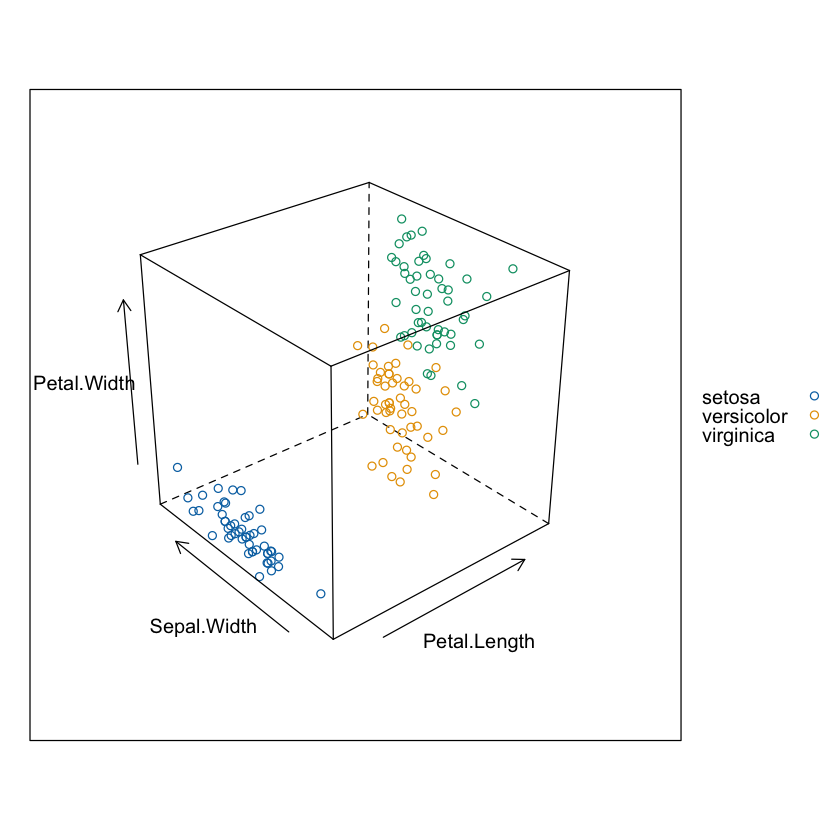

In [18]:
# función cloud: 3-D scatter-plot
cloud(Petal.Width ~ Petal.Length * Sepal.Width, 
      group = Species, data = iris, auto.key = TRUE)

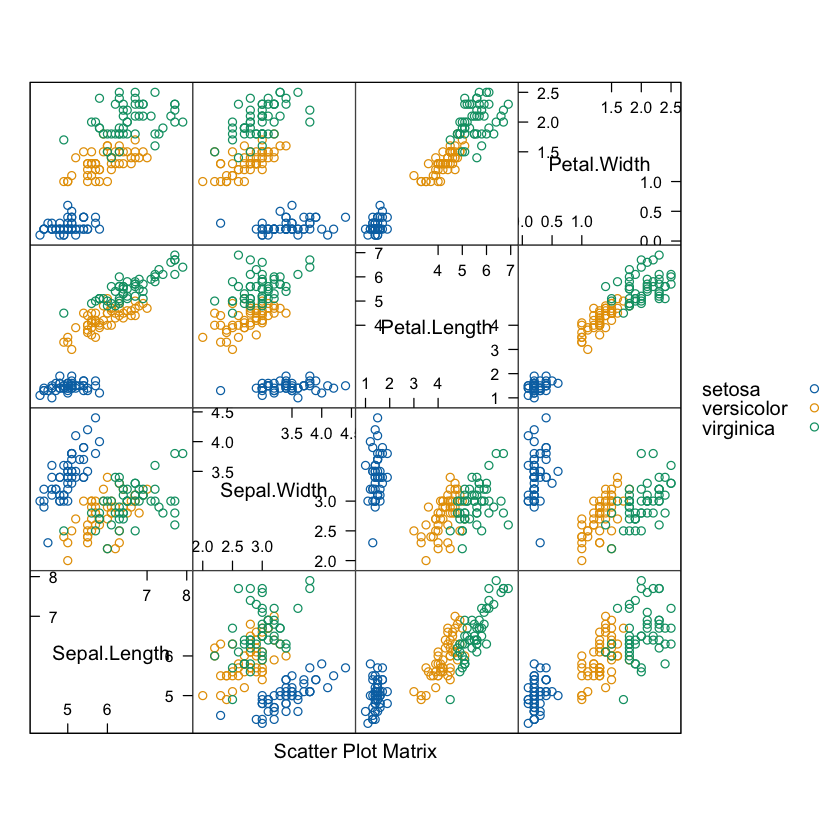

In [19]:
# función splom: matriz de scatter-plots
splom( ~ iris[1:4], groups = Species, data = iris, auto.key = T)

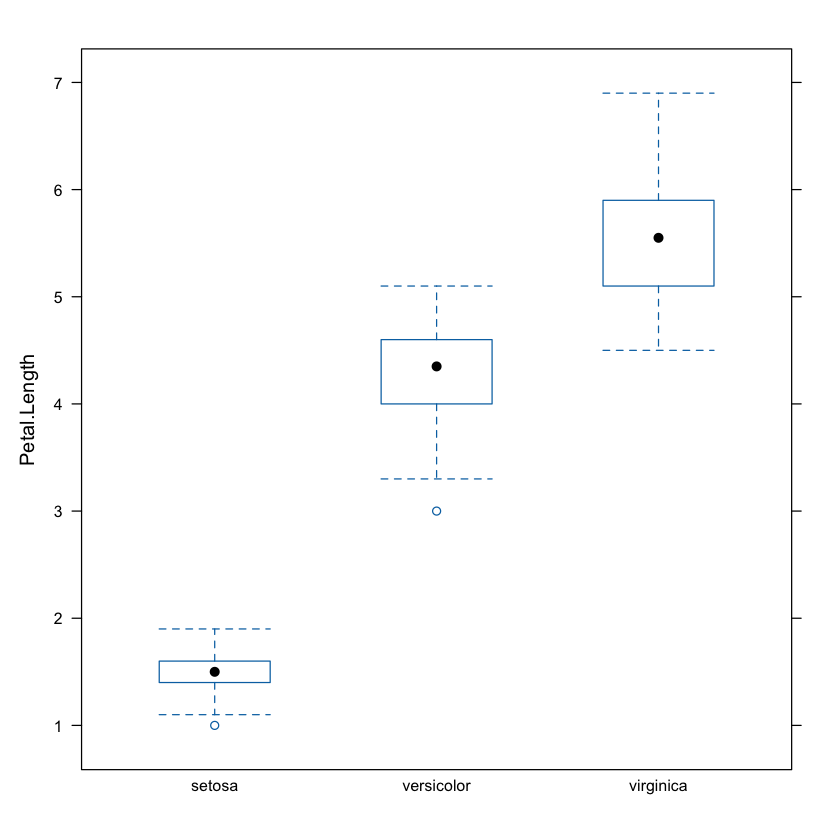

In [20]:
# función bwplot: box-and-whisker plots
bwplot(Petal.Length ~ Species, data = iris)

### El paquete tidyverse
#### Datasets de ejemplo: *Iris de Fisher* y *mpg*

In [1]:
install.packages("tidyverse")
library(tidyverse)


The downloaded binary packages are in
	/var/folders/6z/7vmhpff15y38vh6y2x4gbzwc0000gn/T//RtmpclvAyu/downloaded_packages


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.1     v stringr   1.5.2
v ggplot2   4.0.0     v tibble    3.3.0
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.1.0     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [20]:
#x <- c("ggplot2","dplyr","tidyr","readr","purrr","tibble","stringr","forcats")
#install.packages(x)
#library("ggplot2")
#library("dplyr")
#library("tidyr")
#library("readr")
#library("purrr")
#library("tibble")
#library("stringr")
#library("forcats")

La librería tidyverse carga a su vez las siguientes librerías: 
   * **ggplot2**, para visualizar datos.
   * **dplyr**, para manipular datos.
   * **tidyr**, para ordenar datos.
   * **readr**, para importar datos.
   * **purrr**, para programar funciones.
   * **tibble**, para la manipulación de `tibbles`, la versión moderna de los `data.frames`.
   * **stringr**, para manipular cadenas de caracteres (character strings).
   * **forcats**, para manipular factores.
   
En el siguiente ejemplo utilizamos la función `ggplot()` (del paquete `ggplot2`) para visualizar los datos de *iris*.
 
**Se comienza una gráfica con la función `ggplot()`**, que crea un sistema de coordenadas al que **se pueden agregar nuevas capas con el operador `+`**. Por ejemplo, podemos crear un gráfico vacío con `ggplot(data = iris)` y completarlo con una capa de puntos (un scatter) generada por la función `geom_point`:

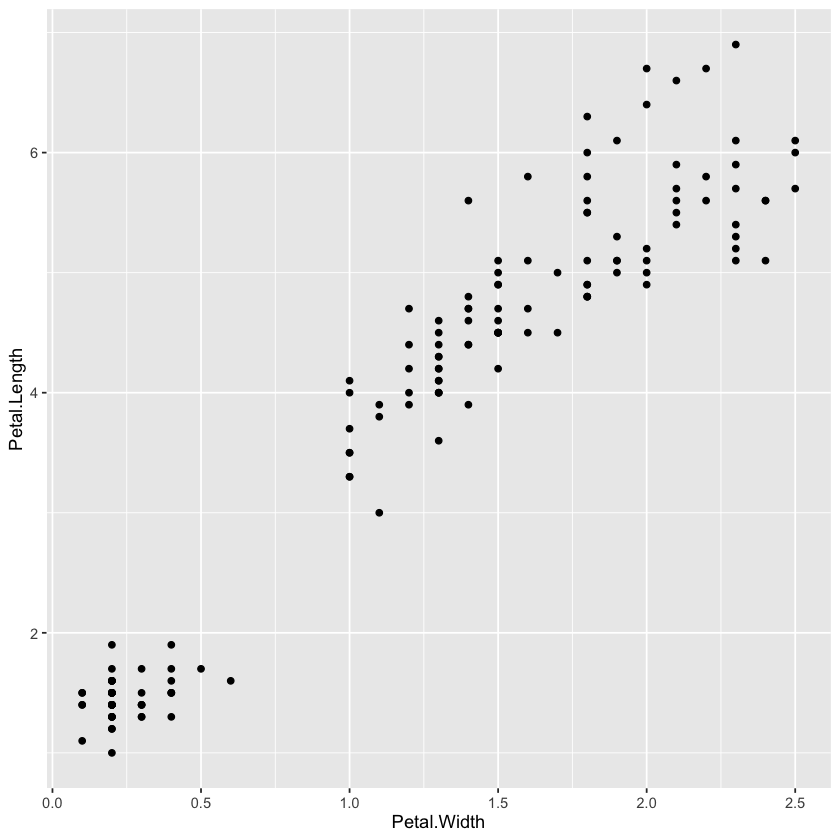

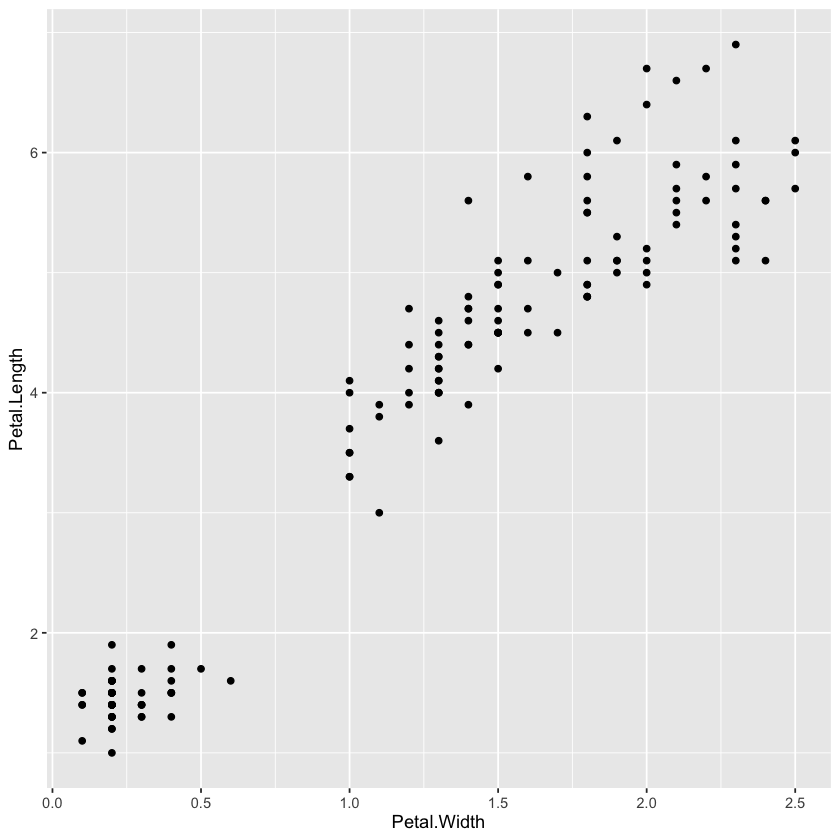

In [2]:
# scatter-plot
ggplot(data = iris) +
geom_point(aes(x = Petal.Width, y = Petal.Length))

ggplot(data = iris, aes(x = Petal.Width, y = Petal.Length)) + 
geom_point()

`geom_smooth()` using formula = 'y ~ x'


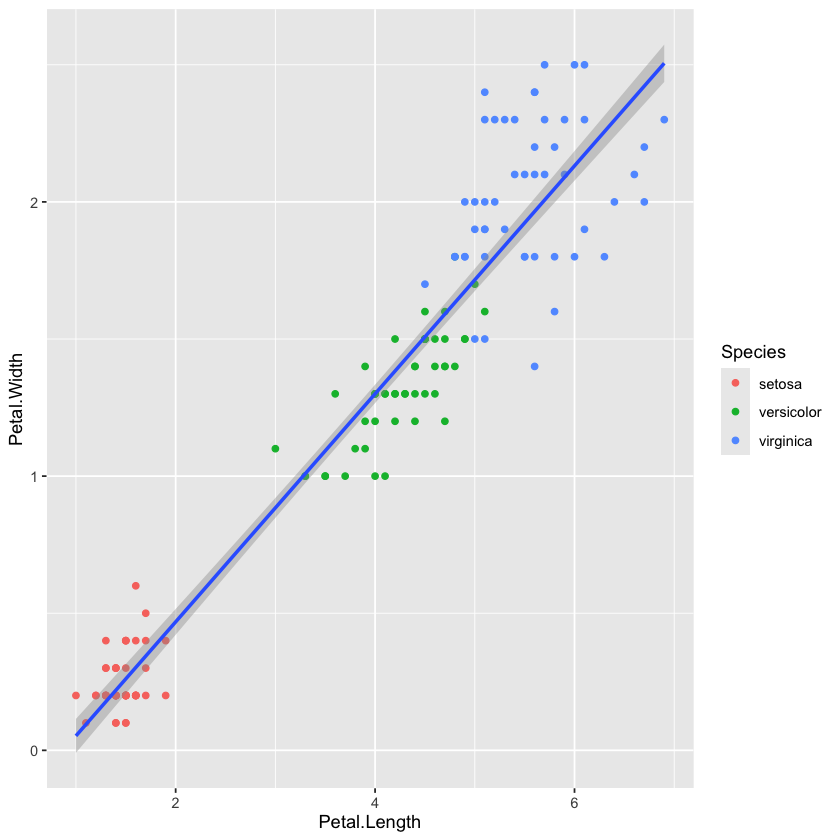

In [3]:
# scatter-plot + recta de regresión
ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
  geom_point(aes(color = Species)) +
  geom_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'


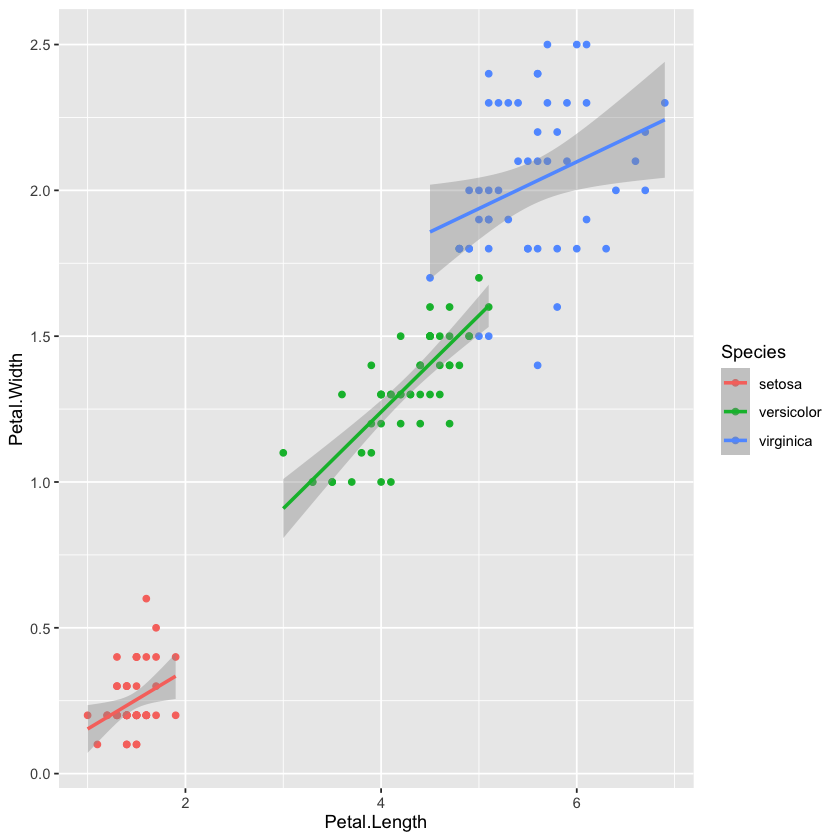

In [4]:
# scatter plot + recta de regresión (por cada especie)
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) +
  geom_point() +
  geom_smooth(method = "lm")

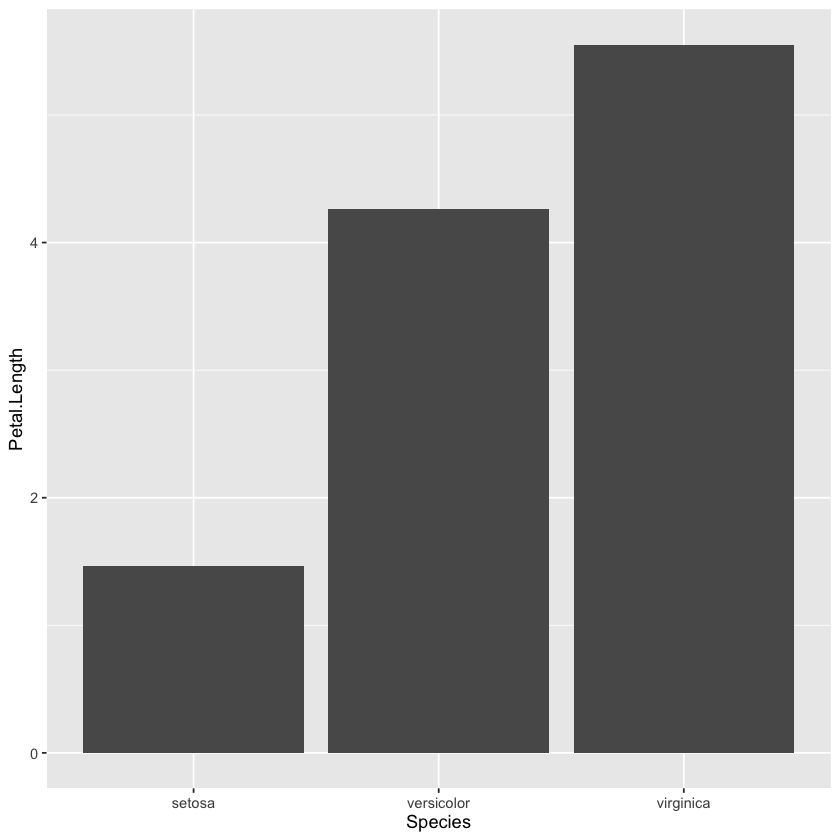

In [5]:
# barplots
ggplot(iris, aes(Species, Petal.Length)) +
  geom_bar(stat = "summary", fun = "mean")

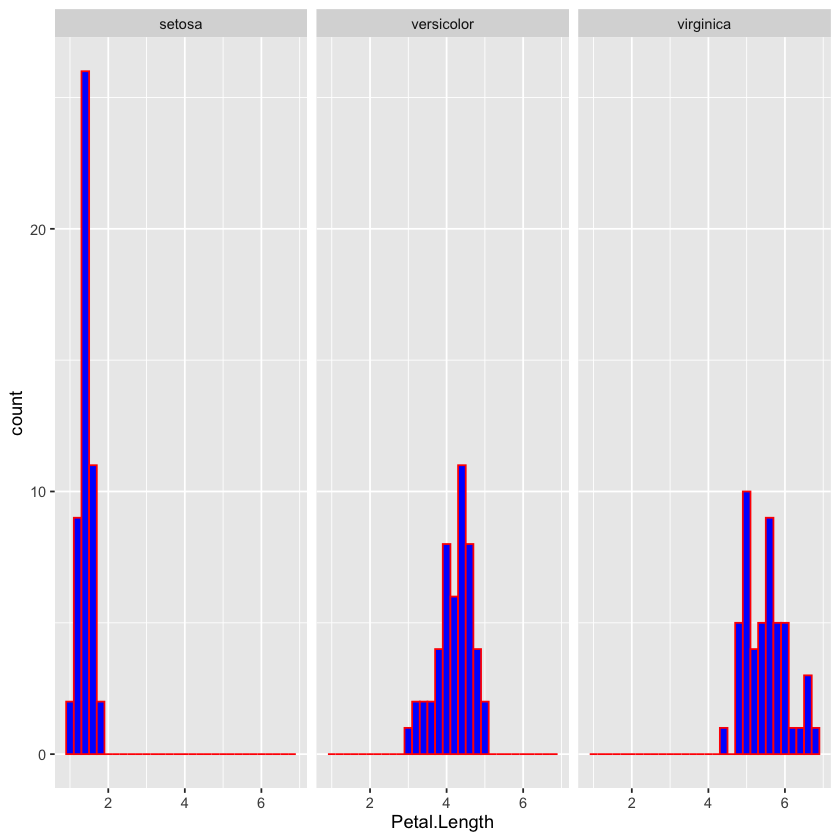

In [6]:
# histogramas (uno por cada especie)
ggplot(data = iris, mapping = aes(x = Petal.Length, color = Species)) +
geom_histogram(binwidth = 0.2, fill = "blue", color = "red") +
facet_wrap(~ Species)

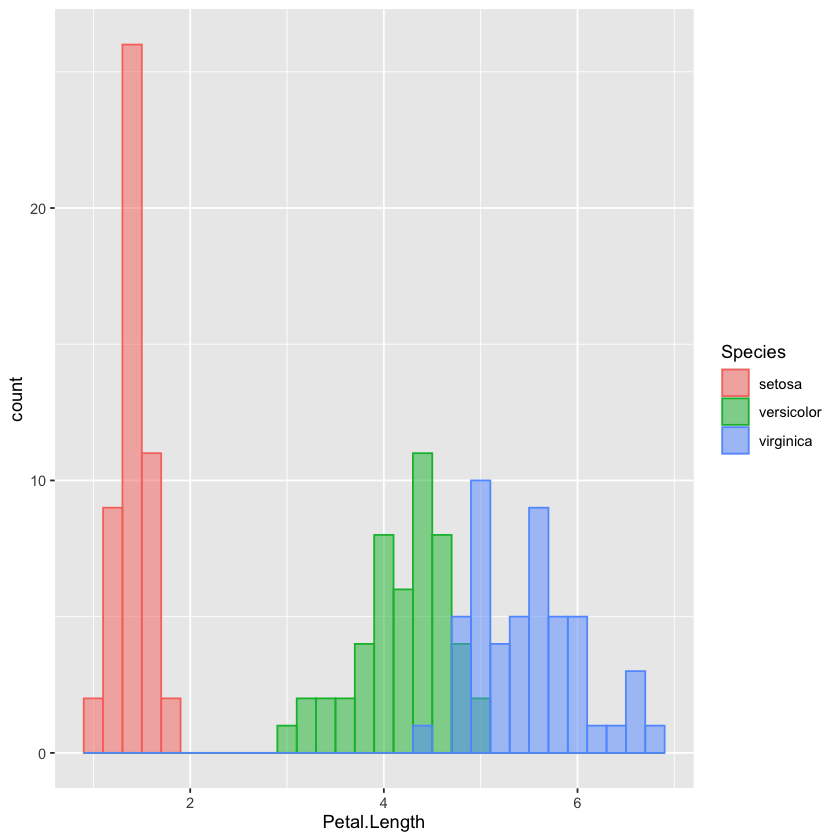

In [7]:
# histogramas solapados
ggplot(data = iris, mapping = aes(x = Petal.Length, fill = Species, color = Species)) +
geom_histogram(binwidth = 0.2, position = "identity", alpha = 0.5)

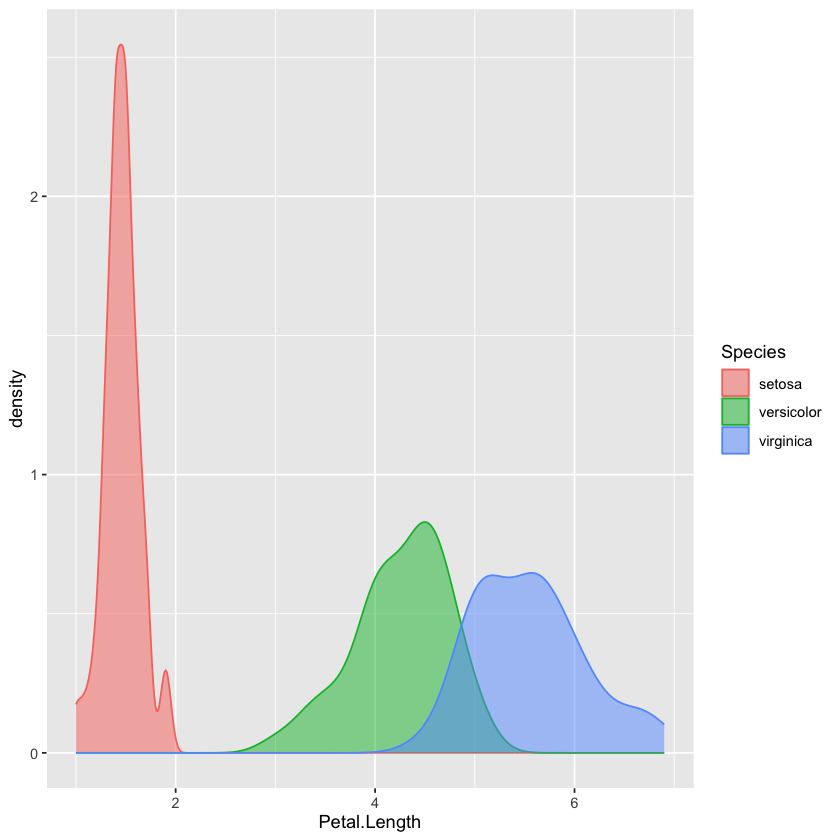

In [8]:
# density plot
ggplot(data = iris, mapping = aes(x = Petal.Length, fill = Species, color = Species)) +
geom_density(position = "identity", alpha = 0.5)

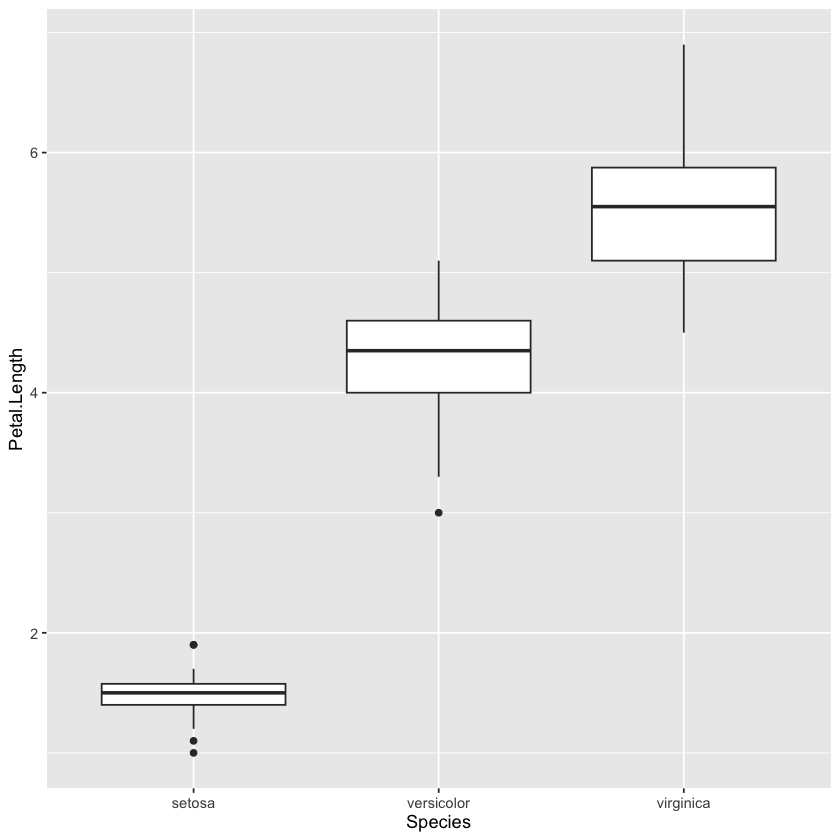

In [9]:
# boxplots
ggplot(data = iris) +
geom_boxplot(aes(Species, Petal.Length))

Podemos convertir el data frame *iris* a un objeto de tipo *tibble*:

In [10]:
# convierto data.frame a tibble
class(iris)
iris <- as_tibble(iris)
class(iris)

iris$Sepal.Length
str(iris)

[1] "data.frame"

[1] "tbl_df"     "tbl"        "data.frame"

[1] 5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 [19] 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 [37] 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 [55] 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 [73] 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 [91] 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
[109] 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
[127] 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
[145] 6.7 6.7 6.3 6.5 6.2 5.9

tibble [150 x 5] (S3: tbl_df/tbl/data.frame)
 $ Sepal.Length: num [1:150] 5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num [1:150] 3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num [1:150] 1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num [1:150] 0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


De aquí en adelante utilizaremos el dataset *mpg* incluido en el paquete *ggplot2*.

---
### Ejercicio 1

¿Qué clase de objeto es `mpg`? ¿Cuántas observaciones contiene? ¿De qué variables? ¿De qué tipo es cada variable?

In [11]:
# solución
str(mpg)
summary(mpg)

tibble [234 x 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

Utiliza `ggplot` para visualizar `displ` y `hwy`. ¿Qué podemos decir de estas dos variables?
* `displ`, tamaño del motor del coche en litros
* `hwy`, millas recorridas en autovía por cada galón de combustible

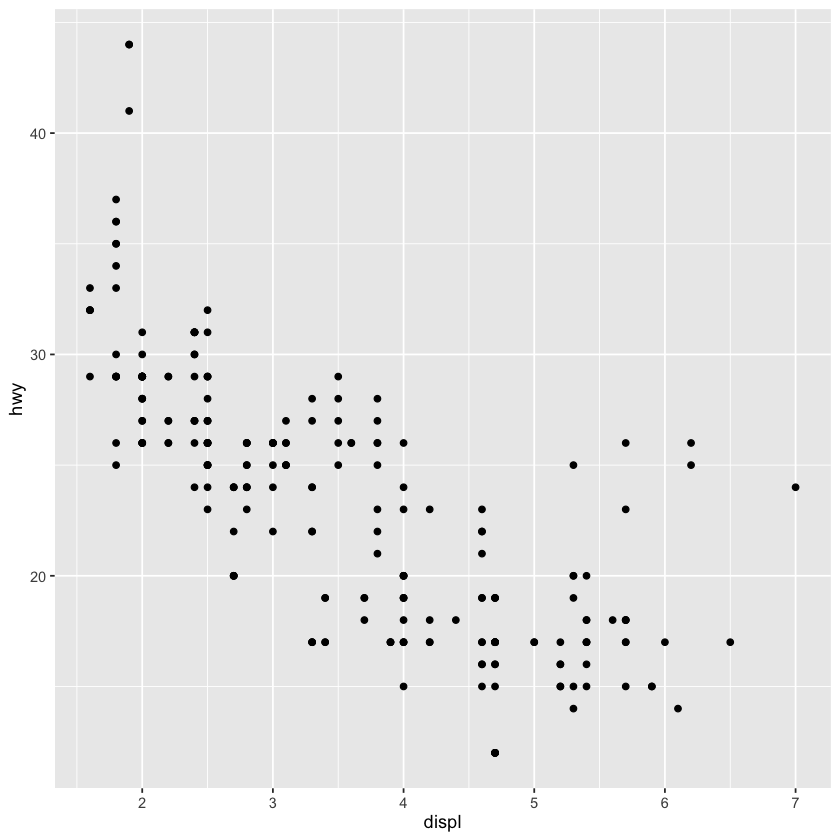

In [12]:
# ggplot(...) + geom_point(...)
ggplot(data = mpg) +
geom_point(aes(x = displ, y = hwy))

Si volvemos a pintar el mismo gráfico pero asociando un color distinto a cada tipo de automóvil (variable `class`) se pueden sacar conclusiones interesantes

---
### Ejercicio 2

1) Crea un gráfico de puntos (`displ` vs `hwy`) con `ggplot` donde los puntos se diferencien por color (`color`) para una variable categórica (por ejemplo `class`) y por tamaño de punto (`size`) para una variable continua (por ejemplo `cty`).

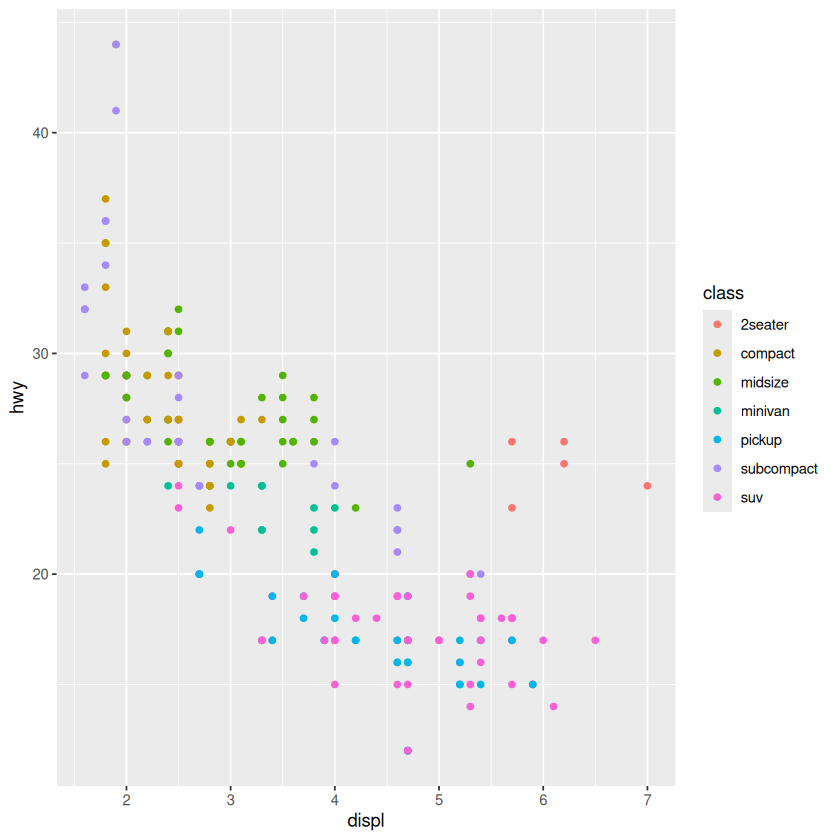

In [32]:
ggplot(mpg) + geom_point(aes(x = displ, y = hwy, color = class))

2) Trata de diferenciar los puntos del gráfico con formas diferentes (`shape`) para aquellos que corresponden a un `cty`>= 20 y los que corresponden a un `cty` < 20

In [33]:
# solución


Otra estrategia útil para diferenciar grupos de puntos es utilizar `facet_wrap()` como una capa más de `ggplot`.

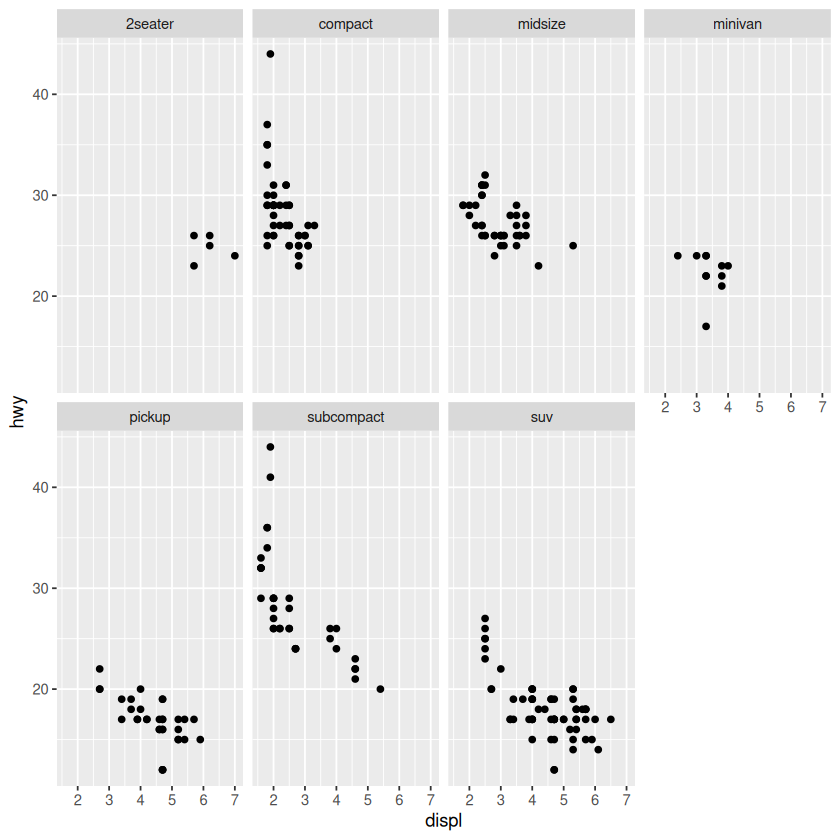

In [34]:
ggplot(data = mpg) + 
  geom_point(aes(x = displ, y = hwy)) + 
  facet_wrap(~class, nrow = 2)

## Transformación de datos
### (Dataset de ejemplo: *flights*)

La visualización es una herramienta importante para la generación de información, pero es raro obtener los datos en la forma en que se requiere para poder graficarla directamente. A menudo, será necesario crear nuevas variables, generar información sintetizada, reordenar observaciones, cambiar el tipo y/o nombre de algunas variables... para que sea más fácil trabajar con los datos.

Continuando con el uso de los paquetes de `tidyverse`, utilizaremos el paquete **`dplyr`** para transformar el dataset `flights` (flights departing New York City in 2013), contenido en el paquete `nyflights13`.

In [ ]:
# familiarízate con el dataset

#install.packages("nycflights13")
library(nycflights13)
str(flights)


The downloaded binary packages are in
	/var/folders/6z/7vmhpff15y38vh6y2x4gbzwc0000gn/T//RtmpclvAyu/downloaded_packages
tibble [336,776 x 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N

Las cinco **funciones clave de `dplyr`** que permiten resolver la gran mayoría de los problemas de manipulación de datos son las siguientes:

  * **filter()**, extrae subconjuntos de datos en función de sus valores.
  * **arrange()**, reordena filas.
  * **select()**, extrae variables por su nombre.
  * **mutate()**, crea nuevas variables a partir de las existentes.
  * **summarise()**, proporciona un resumen.

### Filtrar filas

Mediante el uso de los operadores comparativos: **>, >=, <, <=, !=, ==**

In [15]:
jan1 <- filter(flights, month == 1, day == 1)
str(jan1)

tibble [842 x 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:842] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:842] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:842] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:842] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:842] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:842] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:842] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:842] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:842] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:842] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:842] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:842] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:842] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr [1:842] "IAH" "IAH" "MIA" "BQN" ...
 $ ai

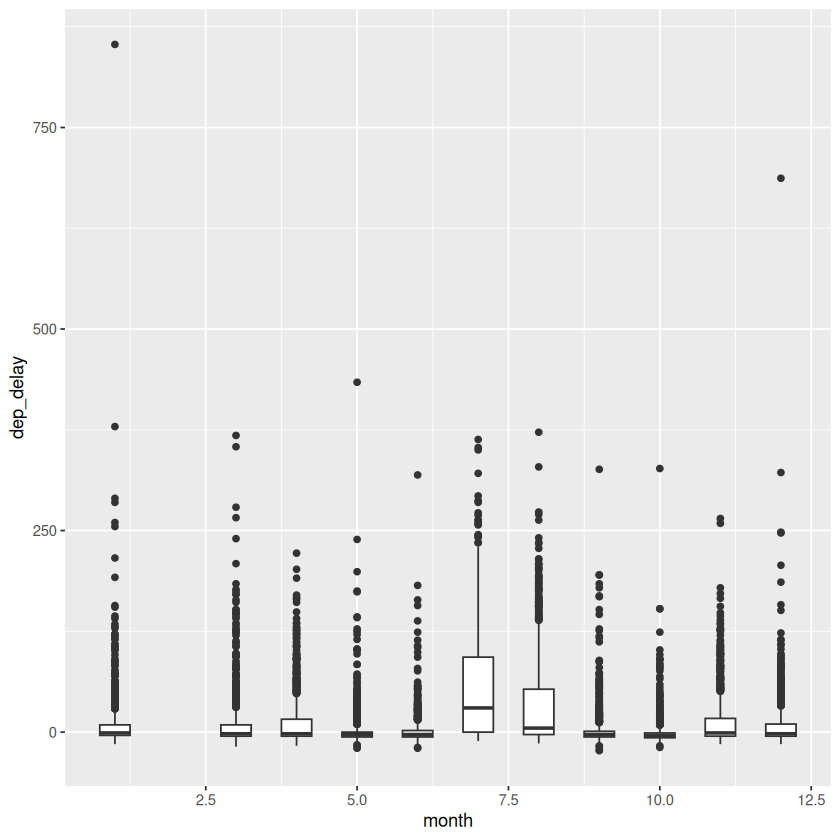

In [37]:
nofeb1 <- filter(flights, month != 2, day == 1)
ggplot(data = nofeb1) +
geom_boxplot(aes(x = month, y = dep_delay, group = month), 
             width = 0.5, na.rm = TRUE)

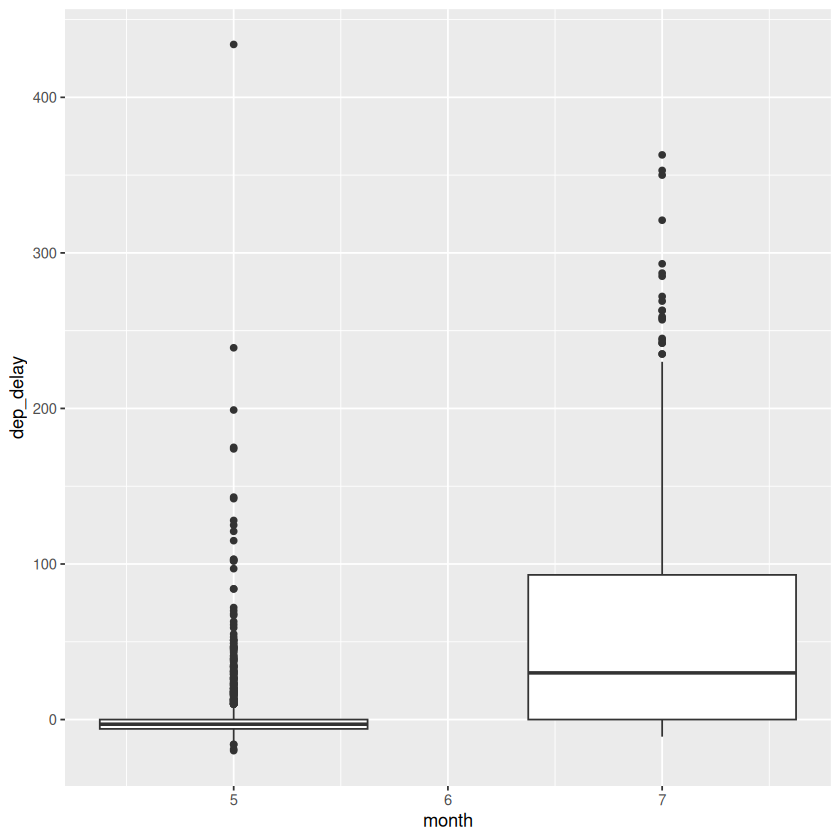

In [38]:
mayjul1 <- filter(flights, month == 5 | month == 7, day == 1)
ggplot(mayjul1) +
geom_boxplot(aes(x = month, y = dep_delay, group = month), 
             width = 1.25, na.rm = TRUE)

### Ordenar filas

[1] "tbl_df"     "tbl"        "data.frame"

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 6 1 9 7 4 3 6 7 12 ...
 $ day           : int [1:336776] 9 15 10 20 22 10 17 27 22 5 ...
 $ dep_time      : int [1:336776] 641 1432 1121 1139 845 1100 2321 959 2257 756 ...
 $ sched_dep_time: int [1:336776] 900 1935 1635 1845 1600 1900 810 1900 759 1700 ...
 $ dep_delay     : num [1:336776] 1301 1137 1126 1014 1005 ...
 $ arr_time      : int [1:336776] 1242 1607 1239 1457 1044 1342 135 1236 121 1058 ...
 $ sched_arr_time: int [1:336776] 1530 2120 1810 2210 1815 2211 1020 2226 1026 2020 ...
 $ arr_delay     : num [1:336776] 1272 1127 1109 1007 989 ...
 $ carrier       : chr [1:336776] "HA" "MQ" "MQ" "AA" ...
 $ flight        : int [1:336776] 51 3535 3695 177 3075 2391 2119 2007 2047 172 ...
 $ tailnum       : chr [1:336776] "N384HA" "N504MQ" "N517MQ" "N338AA" ...
 $ origin        : chr [1:336776] "JFK" "JFK" "EWR" "

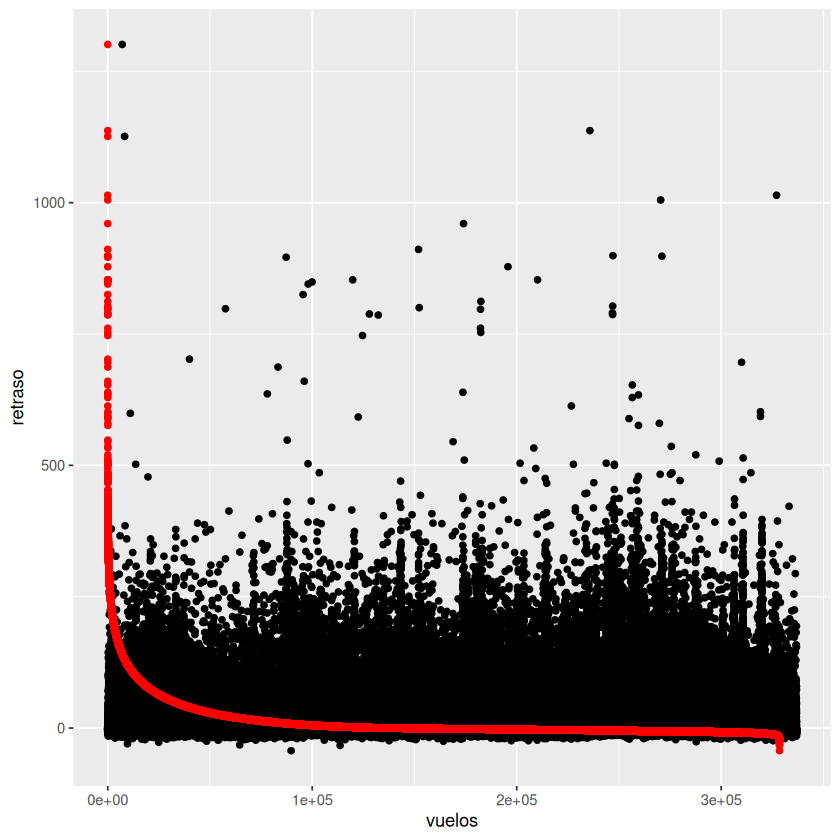

In [39]:
# ¿Qué crees que hará el siguiente código?

bydelay <- arrange(flights, desc(dep_delay))
class(bydelay)
str(bydelay)

ggplot(flights) +
geom_point(aes(1:nrow(flights), dep_delay), na.rm = TRUE) +
geom_point(aes(1:nrow(flights), bydelay$dep_delay), color = "red", na.rm = TRUE) +
labs(x = "vuelos", y = "retraso")

---
### Ejercicio 3

¿Qué día tuvo lugar el vuelo más largo? ¿Y el más corto?

In [40]:
# solución


### Seleccionar columnas

In [41]:
# seleccionar por el nombre de la columna
print(select(flights, year, month, day))

# seleccionar todas las columnas entre "year" y "day"
print(select(flights, year:day))

# seleccionar todas las columnas excepto las que están entre "year" y "day"
print(select(flights, -(year:day)))

# A tibble: 336,776 × 3
    year month   day
   <int> <int> <int>
 1  2013     1     1
 2  2013     1     1
 3  2013     1     1
 4  2013     1     1
 5  2013     1     1
 6  2013     1     1
 7  2013     1     1
 8  2013     1     1
 9  2013     1     1
10  2013     1     1
# ℹ 336,766 more rows
# A tibble: 336,776 × 3
    year month   day
   <int> <int> <int>
 1  2013     1     1
 2  2013     1     1
 3  2013     1     1
 4  2013     1     1
 5  2013     1     1
 6  2013     1     1
 7  2013     1     1
 8  2013     1     1
 9  2013     1     1
10  2013     1     1
# ℹ 336,766 more rows
# A tibble: 336,776 × 16
   dep_time sched_dep_time dep_delay arr_time sched_arr_time arr_delay carrier
      <int>          <int>     <dbl>    <int>          <int>     <dbl> <chr>  
 1      517            515         2      830            819        11 UA     
 2      533            529         4      850            830        20 UA     
 3      542            540         2      923            850   

Hay una serie de funciones "helper" que pueden utilizarse dentro de la función `select()`. Algunas de ellas son las siguientes:

   * `last_col()`
   * `starts_with("abc")`
   * `ends_with("xyz")`
   * `contains("ijk")`

In [42]:
flight_times <- select(flights, ends_with("time"))
str(flight_times)

tibble [336,776 × 5] (S3: tbl_df/tbl/data.frame)
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ air_time      : num [1:336776] 227 227 160 183 116 150 158 53 140 138 ...


### Añadir nuevas variables

Además de seleccionar conjuntos de columnas existentes, a menudo es útil agregar nuevas columnas que son funciones de columnas existentes. Para esto se utiliza la función `mutate()`.

`mutate()` siempre agrega nuevas columnas al final de un conjunto de datos, por lo que utilizaremos un subconjunto de `fights` (usando `select()`) para que podamos ver las nuevas variables. 

In [43]:
# selección de variables dentro de flights
flights.sml <- select(flights, 
  year:day, 
  ends_with("delay"), 
  distance, 
  air_time
)
names(flights.sml)

# agrego dos nuevas variables a flights.sml
flights.sml2 = mutate(flights.sml,
  gain = dep_delay - arr_delay,
  speed = distance / (air_time/60)
)
print(flights.sml2)

[1] "year"      "month"     "day"       "dep_delay" "arr_delay" "distance" 
[7] "air_time"

# A tibble: 336,776 × 9
    year month   day dep_delay arr_delay distance air_time  gain speed
   <int> <int> <int>     <dbl>     <dbl>    <dbl>    <dbl> <dbl> <dbl>
 1  2013     1     1         2        11     1400      227    -9  370.
 2  2013     1     1         4        20     1416      227   -16  374.
 3  2013     1     1         2        33     1089      160   -31  408.
 4  2013     1     1        -1       -18     1576      183    17  517.
 5  2013     1     1        -6       -25      762      116    19  394.
 6  2013     1     1        -4        12      719      150   -16  288.
 7  2013     1     1        -5        19     1065      158   -24  404.
 8  2013     1     1        -3       -14      229       53    11  259.
 9  2013     1     1        -3        -8      944      140     5  405.
10  2013     1     1        -2         8      733      138   -10  319.
# ℹ 336,766 more rows


## Importar (leer) y exportar (escribir) datos

### (Dataset de ejemplo: *Iris de Fisher* y *flights*)

Trabajar con los datos proporcionados por los paquetes de R es una excelente manera de familiarizarse con las herramientas más comunes en data science, pero en algún momento necesitaréis comenzar a trabajar con vuestros propios datos. Utilizaremos el paquete **`readr`**, que es también parte de `tidyverse`.

### Leer datos
La mayoría de las funciones de lectura convierten archivos de texto planos en data frames:

* `read_csv()` lee archivos delimitados por comas, `read_csv2()` lee archivos separados por punto y coma, `read_tsv()` lee archivos delimitados por tabulaciones, y `read_delim()` lee archivos con cualquier delimitador.

* `read_fwf()` lee archivos de ancho fijo. Se pueden especificar campos por su ancho con `fwf_widths()` o su posición con `fwf_positions()`.

* `read_table()` lee una variación común de archivos de ancho fijo donde las columnas están separadas por espacios en blanco.

* `read_log()` lee archivos de configuración de tipo Apache (ver https://www.screamingfrog.co.uk/an-seos-guide-to-apache-log-files/)

**Ejercicio:**

  Descarga el fichero `iris.csv` de la web de Kaggle (https://www.kaggle.com/datasets/uciml/iris) e impórtalo en tu sesión de R con las funciones `read.csv` (paquete `utils`) y `read_csv` (paquete `readr`). ¿Qué observas?

In [2]:
#install.packages("utils")
library(readr)

In [3]:
iris.utils <- read.csv("data/Iris.csv")
str(iris.utils)

iris.readr <- read_csv("data/Iris.csv")
str(iris.readr)

'data.frame':	150 obs. of  6 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...


Rows: 150 Columns: 6
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Species
dbl (5): Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [150 x 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id           : num [1:150] 1 2 3 4 5 6 7 8 9 10 ...
 $ SepalLengthCm: num [1:150] 5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num [1:150] 3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num [1:150] 1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num [1:150] 0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : chr [1:150] "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SepalLengthCm = col_double(),
  ..   SepalWidthCm = col_double(),
  ..   PetalLengthCm = col_double(),
  ..   PetalWidthCm = col_double(),
  ..   Species = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


También podemos pasar a `read_csv` un csv que generemos "al vuelo" en R. Si no se indica lo contrario, la primera línea sirve para dar nombre a las variables que se van a leer a continuación. 

In [4]:
read_csv("a,b,c
1,2,3
4,5,6")

Rows: 2 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (3): a, b, c

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


A veces hay algunas líneas de metadatos en la parte superior del archivo:
* El argumento `skip = n` se usa para omitir las primeras n líneas. 
* El argumento `comment = "#"` se usa para eliminar todas las líneas que comienzan con (por ejemplo #)

In [5]:
read_csv("The first line of metadata
  The second line of metadata
  x,y,z
  1,2,3", skip = 2)

Rows: 1 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (3): x, y, z

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


x,y,z
<dbl>,<dbl>,<dbl>
1,2,3


In [6]:
read_csv("# A comment I want to skip
  x,y,z
  1,2,3", comment = "#")

Rows: 1 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (3): x, y, z

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


x,y,z
<dbl>,<dbl>,<dbl>
1,2,3


El símbolo `\n` se usa para agregar una nueva línea. Por otra parte, `col_names` permite dar nombres a las columnas. 

In [7]:
# nombrar las columnas automáticamente
read_csv("1,2,3\n4,5,6", col_names = FALSE)  

Rows: 2 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (3): X1, X2, X3

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Puedes pasar a `col_names` un vector de caracteres que se usará como nombres de columna:

In [8]:
# nombrar las columnas a deseo del usuario
read_csv("1,2,3\n4,5,6", col_names = c("col1", "col2", "col3"))

Rows: 2 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (3): col1, col2, col3

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


col1,col2,col3
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


El argumento `na` se usa para especificar qué valor (o valores) del archivo son "missing values":

In [9]:
read_csv("a,b,c\n1,2,.", na = ".")

Rows: 1 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (2): a, b
lgl (1): c

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<lgl>
1,2,NA


Las principales ventajas de `read_csv` (paquete `readr`) frente a `read.csv` (paquete `utils`) son:
* Es más rápido.
* Importa los datos a un objeto de clase `tibble`. De manera que...
    - No convierte los "character" a "factor" for defecto
    - No usa nombres de filas
    - No transforma los nombres de columna

---
### Ejercicio 4

Identifica qué está mal en los siguientes csv y corrígelo:

In [10]:
read_csv("a,b\n1,2,3\n4,5,6")
read_csv("a;b\n1;3")

# solución
read_csv("a,b,c\n1,2,3\n4,5,6")
read_csv("a,b\n1,3")

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 2 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (1): a
num (1): b

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<dbl>,<dbl>
1,23
4,56


Rows: 1 Columns: 1
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): a;b

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


a;b
<chr>
1;3


Rows: 2 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (3): a, b, c

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Rows: 1 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (2): a, b

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<dbl>,<dbl>
1,3


¿Qué función de importación utilizarías para un archivo separado por "|" (e.g. "a|b|c\n1|2|3")? Escribe un ejemplo a continuación:

In [11]:
# solución


### Escribir datos

`readr` incluye tres funciones útiles para escribir datos en disco: `write_csv()`, `write_delim()` `write_tsv()`

---

### Ejercicio 5

Exporta el dataset `flights` como un fichero csv a tu ordenador, salvando los missing values como -999 (utiliza `?write_csv` como ayuda).

In [ ]:
# solución
write_csv(x = flights, file = "data/flights.csv")

---

## Ordenar datos

### (Datasets de ejemplo: *table1*, *table2*, *table3*, ... y *flights*)

A veces nos tenemos que enfrentar a datasets desordenados y complejos. El paquete **`tidyr` ofrece herramientas que ayudan a ordenar datos.** 
Los datos que utilizaremos en esta sección se incluyen en el paquete `tidyr`: `table1`, `table2`, `table4a` y `table4b`

In [ ]:
table1

In [ ]:
table2

In [ ]:
table3

In [ ]:
table4a  # solo 'cases'

In [ ]:
table4b  # solo 'population'

Todas estas tablas son representaciones del mismo conjunto de datos subyacente, pero no son igualmente fáciles de usar. Nuestro objetivo es obtener un conjunto de datos ordenado.


Hay tres reglas que cumple un **conjunto de datos ordenado**:

* **Cada variable** debe tener su **propia columna**.
* **Cada observación** debe tener su **propia fila**.
* **Cada valor** debe tener su **propia celda**.

![](figs/tidy-1.png)

En este ejemplo, únicamente `table1` está ordenada: es la única representación donde cada columna es una variable.

In [ ]:
# añadimos la variable rate (en %) a table1
# solución


Un problema común que nos encontramos en muchos datasets es que algunos **nombres de columnas** no son nombres de variables, sino **valores de una variable**, como ocurre por ejemplo en `table4a` y `table4b`. En estos casos podemos recurrir a la función `gather()`

In [ ]:
table4a
tidy4a <- gather(table4a, "1999", "2000", key = "year", value = "cases")
tidy4a

In [ ]:
table4b
tidy4b <- gather(table4b, "1999", "2000", key = "year", value = "population")
tidy4b

Podemos utilizar la función `left_join()` de `dplyr` para combinar `tidy4a` y `tidy4b`:

In [ ]:
left_join(tidy4a, tidy4b)

A veces una **observación** está dispersa **en varias filas** (e.g. `table2`, una observación es un país en un año, pero cada observación se distribuye en dos filas). En estos casos podemos recurrir a la función `spread()`. 

In [ ]:
table2
tidy2 <- spread(table2, key = type, value = count)
tidy2

A veces podemos encontrarnos con **una columna** que contiene **dos variables** (e.g. `table3`, la columna `rate` contiene las variables `cases` y `population`). En esos casos podemos recurrir a la función `separate()`. 

In [ ]:
table3
tidy3 <- separate(table3, rate, into = c("cases", "population"), sep = "/")
tidy3

La función `unite()` sería la inversa a `separate()`, ya que nos permite **combinar** múltiples **variables en una única**

In [ ]:
unite(tidy3, cases_population, cases, population, sep = "_")

--- 
### Ejercicio 6

Utiliza el dataset `flights.sml` y la función `unite()` para crear la variable `fecha` que combina el año, el mes y el día.

In [ ]:
# solución


---

**Uso de pipes**

Hasta ahora hemos ido ejecutando cada proceso con líneas de código independientes, asignando cada resultado provisional a una nueva variable. Sin embargo, es bastante común ir enlazando código mediante el símbolo `%>%`. Por ejemplo:

In [ ]:
iris %>%
group_by(Species) %>%
  summarise(meanSL = mean(Sepal.Length), meanSW = mean(Sepal.Width), 
          meanPL = mean(Petal.Length), meanPW = mean(Petal.Width))

**Ejemplo ilustrativo**

  En el siguiente ejemplo se importa el dataset contenido en el archivo *titanic.csv* y se realizan una serie de operaciones encadenadas con él:

In [ ]:
titanic <- read_csv("./data/titanic.csv")
str(titanic)

In [ ]:
titanic %>%

  select(-PassengerId, -Name, -Cabin, -Ticket) %>%  # elimino variables

  mutate(Sex = fct_recode(Sex, # modifico los niveles de dos variables tipo factor a mano
           "0" = "male",
           "1" = "female"),
         Embarked = fct_recode(Embarked,
           "1" = "S",
           "2" = "C",
           "3" = "Q")) %>%

  mutate(Sex = as.integer(Sex), # convierto de string a entero para que todas las variables del dataset sean numéricas
         Embarked = as.integer(Embarked)) %>%

  filter(complete.cases(.)) %>%  # elimino missing values

  cor() %>%  # calculo la correlación de cada variable con todas las demás

  abs() %>%  # calculo el valor absoluto de las correlaciones

  levelplot(col.regions = rev(gray.colors(20)), at = seq(0, 1, 0.05))  # dibujo un p-color con las correlaciones (en valor absoluto) halladas

---

## Caso de estudio

(Dataset de ejemplo: *Kaggle ML and Data Science Survey, 2017*)

[Kaggle](https://www.kaggle.com/) es una plataforma web que reúne a la mayor comunidad de científicos/as de datos del mundo. Kaggle ofrece:
 
 * **Competiciones** publicadas por empresas en las que los participantes compiten para construir el mejor algoritmo que de solución al problema planteado
 * Más de 400000 **notebooks** (sobre todo en Python y R)
 * Más de 50000 **datasets públicos**
 * **Cursos** para aprender o mejorar en data science (e.g. Python, machine learning, visualización de datos...)

![](figs/kaggle_learn.png)

 1) Consulta el "overview" del dataset "Kaggle ML and Data Science Survey, 2017" de Kaggle (https://www.kaggle.com/kaggle/kaggle-survey-2017)

 2) Descárgalo y léelo en R. 
 
 3) Echa un vistazo al código R disponible.
 
 4) Puedes elegir el que más te interese. Este, https://www.kaggle.com/kumarhalake/kaggle-survey-2017-graphical-exploration, es apropiado para visualizar datos. Puedes encontrar otro donde muestren cómo transformar los datos, por ejemplo, https://www.kaggle.com/mrisdal/dealing-with-dirty-data-on-the-job, o cómo ordenarlos (tidy).
 
 5) Reproduce alguno de los gráficos y pasos que se muestran en los notebooks de Kaggle.